## Explanotary Data Analysis aka Разведочный анализ данных

1. Описание дата сета 
2. Георграфическая разбивка данных
3. Отсутствующие данные в дата сете
4. Некоторые характеристики отдельных колонок
5. План дальнейшей работы

In [43]:
import pandas as pd 
import numpy as np 
import re

import seaborn as sns  
import matplotlib.pyplot as plt

## Описание дата сета

Дата сет представляет из себя таблицу из 23 тыс. квартир и 24 колонок, которые характеризуют кажду из квартиры. Доступны следующие колонки: `['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес','Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание','Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел','Можно с детьми/животными', 'Дополнительно', 'Название ЖК','Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод','Ссылка на объявление']`

In [20]:
path = ('../EDA-Real-Estate/_data.csv')
df = pd.read_csv(path, index_col= 0)
df.shape

(23368, 24)

## Географическое распределение квартир

В таблице присутствуют квартиры, представленные на рынке г. Москва, Санкт-Петербурга и Краснодарского края. Для целей нашего проекта мы планируем оставить только квартиры в г. Москва и исключить объявления из других регионов. 

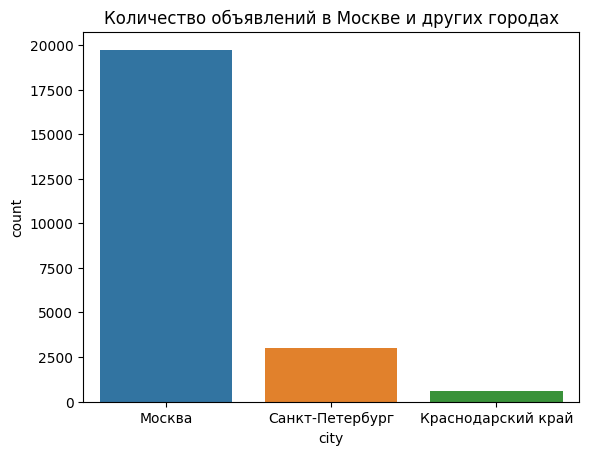

In [39]:
df['city'] = df['Адрес'].apply(lambda x: x.split(',')[0].strip())
sns.countplot(x='city', data=df)
plt.title('Количество объявлений в Москве и других городах')
plt.show()


## Отсутствующие данные в дата сете

В нашем дата сете есть отсутствующие данные, которые необходимо будет преобразовать, чтобы модель смогла их обработать. На графике показана доля отсутствюущих данных в каждой из колонок. 
Нашей командой было принято следующие решение: исключить "Серия дома" и "Название ЖК" из дальнейшего анализа, так как доля отсутствующих значений более 75%. 
С остальными отсутствующими данными мы будем работать в зависимости от типа отсутствующих данных и природы признака. 

Также мы планируем удалить следующие колонки: `"Тип", "Телефоны", "Описание", "Площадь комнат", "Ссылка на объявление"`. Данные колонки либо несут в себе только один признак, либо не информативны для модели. Подробное описание по каждой из колонок будет представлено в коде проекта. 

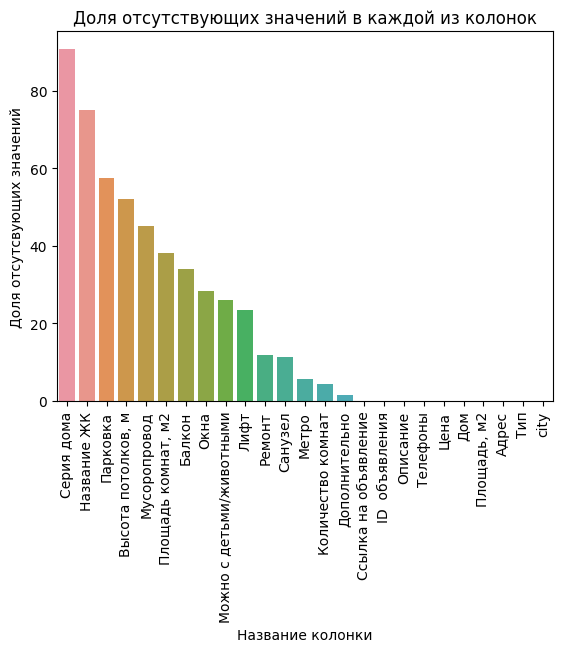

In [42]:
na_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

sns.barplot(x=na_percent.index, y=na_percent.values)
plt.title('Доля отсутствующих значений в каждой из колонок')
plt.xlabel('Название колонки')
plt.ylabel('Доля отсутсвующих значений')
plt.xticks(rotation=90)
plt.show()

## Некоторые характеристики отдельных колонок

В нашем дата сете присутствуют колонки с большим количеством пустых значений (Мусоропровод, Парковка, Окна, Ремонт), но которые мы планируем использовать в дата сете, обработав пустые значения. 

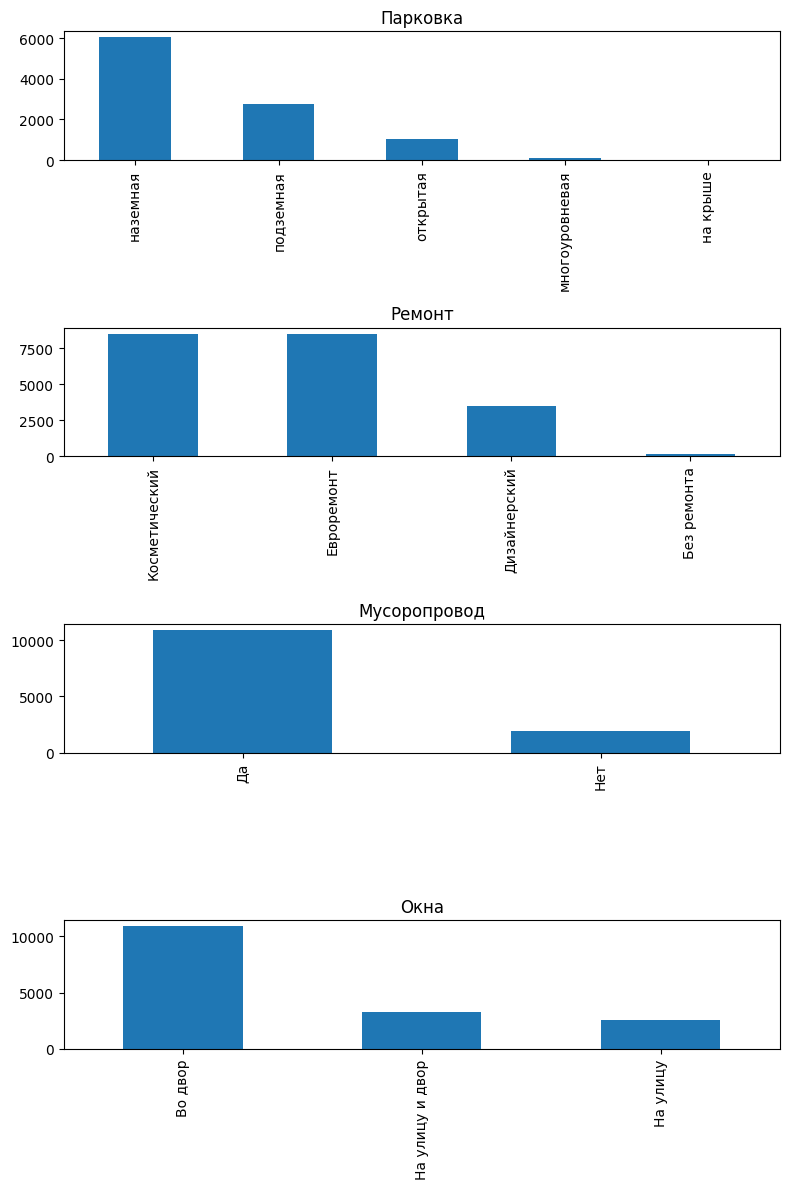

In [49]:
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
df['Парковка'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Парковка')
df['Ремонт'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Ремонт')
df['Мусоропровод'].value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Мусоропровод')
df['Окна'].value_counts().plot(kind='bar', ax=axs[3])
axs[3].set_title('Окна')
plt.tight_layout()
plt.show()

## План дальнейшей работы

1. Заменить названия колонок на английском языке и обработать NaN, None значения 
2. Добавить новые фичи исходя из текущих данных - разбить имеющиеся колонки на несколько, преобразовать текстовые данные в числовые
3. Удалить дубликаты объявлений
4. Передать файл `data.csv` команде машинного обучения для обучения модели